<a href="https://colab.research.google.com/github/LukmanAP/dataset1/blob/main/AsosiasiUseApriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load Data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Data
path='/content/drive/MyDrive/DataSource/data_retail2.xlsx'

# Load Data from Drive
load_data_retail = pd.read_excel(path)

# Membentuk Data Frame
df = pd.DataFrame(load_data_retail)
df.head()

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,2020-12-01 08:26:00,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
1,536365,2020-12-01 08:26:00,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
2,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
3,536365,2020-12-01 08:26:00,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
4,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   InvoiceNo            541909 non-null  object        
 1   InvoiceDate          541909 non-null  datetime64[ns]
 2   BRANCH_SPLR          541909 non-null  int64         
 3   BRANCHNAME_SPLR      541909 non-null  object        
 4   warehouseProductsID  541909 non-null  object        
 5   BARCODEID            541909 non-null  int64         
 6   StockCode            541909 non-null  object        
 7   PRODUCT              541909 non-null  object        
 8   PRODUCT_CATEGORY     541909 non-null  object        
 9   Quantity             541909 non-null  int64         
 10  UnitPrice            541909 non-null  float64       
 11  UnitPriceRupiah      541909 non-null  float64       
 12  oldCUSTID            541909 non-null  object        
 13  CustomerID    

In [ ]:
df['PROVINSI'].value_counts()

JAWA TENGAH            138644
JAWA TIMUR              95089
JAWA BARAT              83588
KAL-SEL                 21452
KEPULAUAN RIAU          18400
BALI                    17508
BANTEN                  15232
KALIMANTAN TIMUR        13860
DI YOGYAKARTA           13496
Jawa Tengah             13176
NUSA TENGGARA BARAT      8576
Jawa timur               7528
JAWA TENGAH              6636
SULAWESI SELATAN         6428
Kalimantan Timur         6424
LAMPUNG                  6280
DIY                      5740
Sumatera Selatan         5592
RIAU                     5476
KALTENG                  5244
SUMATERA UTARA           5200
SULAWESI UTARA           4648
SUMATERA BARAT           4256
SUMATERA SELATAN         4064
KALIMANTAN SELATAN       3532
KALIMANTAN TENGAH        3432
JAWATENGAH               2956
SULAWESI TENGGARA        2076
SULAWESI TENGAH          1480
KALIMANTAN BARAT          480
KAL-BAR                   320
JAMBI                     148
BANGKA BELITUNG            64
Jawa Barat

In [ ]:
df.describe()

,BRANCH_SPLR,BARCODEID,Quantity,UnitPrice,UnitPriceRupiah,CustomerID,CHANNELID_SPLR,SUBDISTID
count,541909.000000,5.419090e+05,541909.000000,541909.000000,5.419090e+05,406829.000000,541909.000000,541909.000000
mean,25.762779,8.144577e+12,9.552250,4.611114,6.593892e+04,15287.690570,36.072115,261119.832586
std,12.696276,5.977482e+12,218.081158,96.759853,1.383666e+06,1713.600303,9.862746,129491.622938
min,1.000000,1.000000e+00,-80995.000000,-11062.060000,-1.581875e+08,12346.000000,14.000000,10209.000000
25%,14.000000,8.888036e+12,1.000000,1.250000,1.787500e+04,13953.000000,32.000000,140223.000000
50%,28.000000,8.992920e+12,3.000000,2.080000,2.974400e+04,15152.000000,32.000000,280305.000000
75%,36.000000,8.998103e+12,10.000000,4.130000,5.905900e+04,16791.000000,41.000000,380109.000000
max,45.000000,8.999999e+14,80995.000000,38970.000000,5.572710e+08,18287.000000,93.000000,450202.000000


##Hasil Analisa


1. Dari data tersebut mencakup 541.909 raw data. Data ini sama dengan jumlah count supplier
2. Jumlah provinsi mencakup 34 provinsi
3. Sebaran setiap branch/supplier dan juga provinsi menunjukkan sebaran data yang berbeda
4. Dibutuhkan analisis per branch/provinsi untuk memberi suggest produk bundling dan produk placement
5. Membutuhkann Transpose data guna membentuk data yang ready untuk proses asosiasi





##DATA PREPARATION

In [ ]:
df['PRODUCT']=df['PRODUCT'].str.strip()

In [ ]:
df['PRODUCT_CATEGORY']=df['PRODUCT_CATEGORY'].str.strip()

In [ ]:
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,2020-12-01 08:26:00,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
1,536365,2020-12-01 08:26:00,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
2,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
3,536365,2020-12-01 08:26:00,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
4,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2021-12-09 12:50:00,22,MALANG,K0336,8888166603240,22613,KG CHOCO SHORT CAKE 225G,BISKUIT,12,...,12680.0,KPRI DIAN HUSADA (DINAS KESEHATAN),JLN SIMPANG LA SUCIPTO NO 45,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR
541905,581587,2021-12-09 12:50:00,22,MALANG,K1923,8888166993044,22899,KG CHOCO WAY FINGER 33G,BISKUIT,6,...,12680.0,ASSALAM,JLN TELUK BAYUR NO 59,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541906,581587,2021-12-09 12:50:00,22,MALANG,K0290,8888166336841,23254,KG CISSY 120G CRACKER,BISKUIT,4,...,12680.0,RAHMA TK,JLN SANAN NO. 1A/14 (BLKG LAPAS),MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541907,581587,2021-12-09 12:50:00,22,MALANG,K3270,8991102023986,23255,KIDDO JUNIOR,PASTA & S-GIGI,4,...,12680.0,KARUNIA,PERUM SUKUN PONDOK INDAH N-9,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR


In [ ]:
# Menghapus InvoiceNo yang diawali dengan huruf C
df['InvoiceNo']=df['InvoiceNo'].astype(str)
df=df[~(df['InvoiceNo'].str[0]=='C')]

In [ ]:
# Transformasi Data
basket=(df[df['PROVINSI']=='JAWA TENGAH'].groupby(['InvoiceNo', 'PRODUCT_CATEGORY'])['Quantity'].count()\
        .unstack().reset_index().fillna(0)\
        .set_index('InvoiceNo')
        )

basket.head()

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
basket

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
575899,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575900,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket.tail(10)

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
575893,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
575894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
575895,0.0,3.0,0.0,0.0,4.0,3.0,2.0,13.0,0.0,0.0,...,0.0,0.0,4.0,2.0,5.0,0.0,2.0,1.0,0.0,1.0
575896,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0
575897,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
575899,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575900,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575901,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Proses Encoded data
# Supaya membentuk flag 1 dan 0

def encode_units(x):
  if x <= 0:
    return 0
  if x >= 0:
    return 1

basket_sets = basket.applymap(encode_units)
basket_sets.tail(5)

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
575898,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
575899,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575900,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575901,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575902,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
##Pemodelan Data

In [ ]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=18391438a489509dd5f940d5fca7991c8eab9e23d79c32db06a0bdc8f260ec42
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

##Profinsi Jawa Tengah

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.326438,(ALAT RUMAH TANGGA)
1,0.348726,(BISKUIT)
2,0.172516,(BUMBU)
3,0.166359,(COKELAT)
4,0.273488,(DETERGEN)
...,...,...
250,0.102204,"(KOSMETIK, SABUN & SAMPHOO, SNACK, MINUMAN)"
251,0.117473,"(KOSMETIK, SABUN & SAMPHOO, SUSU, MINUMAN)"
252,0.102081,"(KOSMETIK, PARFUM, OBATAN, SABUN & SAMPHOO)"
253,0.106760,"(KOSMETIK, PARFUM, SUSU, SABUN & SAMPHOO)"


In [ ]:
rules1 = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALAT RUMAH TANGGA),(BISKUIT),0.326438,0.348726,0.177811,0.544700,1.561974,0.063973,1.430430
1,(BISKUIT),(ALAT RUMAH TANGGA),0.348726,0.326438,0.177811,0.509887,1.561974,0.063973,1.374300
2,(DETERGEN),(ALAT RUMAH TANGGA),0.273488,0.326438,0.140377,0.513282,1.572375,0.051100,1.383887
3,(ALAT RUMAH TANGGA),(DETERGEN),0.326438,0.273488,0.140377,0.430026,1.572375,0.051100,1.274641
4,(KOSMETIK),(ALAT RUMAH TANGGA),0.412757,0.326438,0.181997,0.440931,1.350735,0.047258,1.204792


In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00


In [ ]:
import networkx as nx

In [ ]:
def draw_rules(rules1,PROVINSI):
    plt.figure(figsize=(15,10))
    G=nx.DiGraph()
    G = nx.Graph()
    G.add_edge(0,1,color='r',weight=2)
    G.add_edge(1,2,color='g',weight=4)
    G.add_edge(2,3,color='b',weight=6)
    G.add_edge(3,4,color='y',weight=3)
    G.add_edge(4,5,color='m',weight=1)
    G.add_edge(5,6,color='m',weight=1)
    G.add_edge(6,0,color='m',weight=3)

    node_color=[]
    rule_no=['R0','R1','R2','R3','R4']#,'R5','R6','R7','R8','R9','R10']
    for i in range(len(rule_no)):
        G.add_nodes_from([rule_no[i]])
        for a in rules1.iloc[i]['antecedents']:
            G.add_nodes_from([a])
            G.add_edge(a, rule_no[i])
        for c in rules1.iloc[i]['consequents']:
            G.add_nodes_from([c])
            G.add_edge(rule_no[i], c)
    edges=G.edges()
    for node in G:
        flag_rule=0;
        for i in rule_no:
            if i==node:
                flag_rule=1
        if flag_rule==1:
            node_color.append('red')
        else:
            node_color.append('green')

   #pos=nx.planar_layout(G)
    pos = nx.circular_layout(G)
    colors = nx.get_edge_attributes(G,'color').values()
    weights = nx.get_edge_attributes(G,'weight').values()
    nx.draw(G, pos,
        edge_color=colors,
        width=list(weights),
        with_labels=True,
        node_color='lightgreen')
    for i in pos:
           pos[i][1] += 0.03
    nx.draw_networkx_labels(G,pos)
    plt.title('Top 5 Associations for '+PROVINSI,size=30)
    plt.show()

In [ ]:
G = nx.Graph()
G.add_edge(0,1,color='r',weight=2)
G.add_edge(1,2,color='g',weight=4)
G.add_edge(2,3,color='b',weight=6)
G.add_edge(3,4,color='y',weight=3)
G.add_edge(4,0,color='m',weight=1)

colors = nx.get_edge_attributes(G,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()

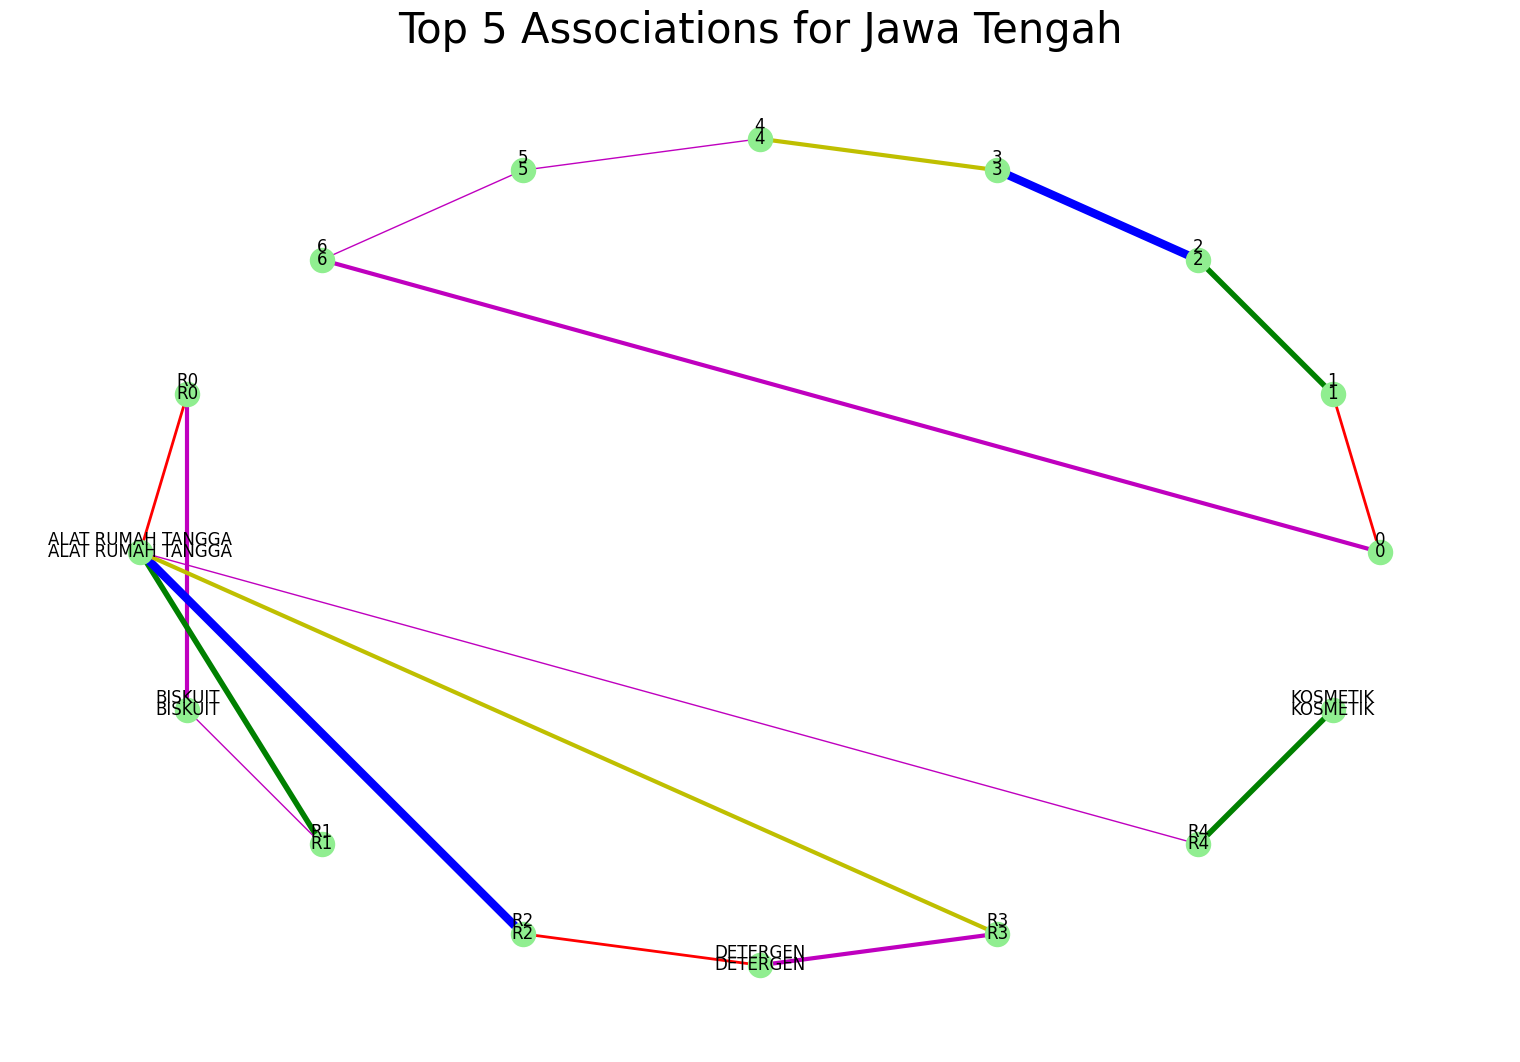

In [ ]:
draw_rules(rules1, 'Jawa Tengah')

In [ ]:
# Transformasi Data
basket1=(df[df['PROVINSI']=='JAWA BARAT'].groupby(['InvoiceNo', 'PRODUCT_CATEGORY'])['Quantity'].count()\
        .unstack().reset_index().fillna(0)\
        .set_index('InvoiceNo')
        )


basket1.head()

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket1

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580725,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
580727,0.0,4.0,37.0,4.0,0.0,47.0,18.0,7.0,23.0,0.0,...,1.0,5.0,22.0,22.0,25.0,0.0,9.0,12.0,0.0,5.0
580728,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Proses Encoded data
# Supaya membentuk flag 1 dan 0

def encode_units(x):
  if x <= 0:
    return 0
  if x >= 0:
    return 1

basket1_sets = basket1.applymap(encode_units)
basket1_sets.tail(5)

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
580725,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
580727,0,1,1,1,0,1,1,1,1,0,...,1,1,1,1,1,0,1,1,0,1
580728,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
580729,0,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,1,1,1,1
580730,0,1,1,0,0,1,1,1,1,0,...,0,0,1,1,1,0,1,1,0,1


In [ ]:
frequent1_itemsets = apriori(basket1_sets, min_support=0.1, use_colnames=True)
frequent1_itemsets

,support,itemsets
0,0.328837,(ALAT RUMAH TANGGA)
1,0.331698,(BISKUIT)
2,0.174739,(BUMBU)
3,0.164112,(COKELAT)
4,0.274474,(DETERGEN)
...,...,...
293,0.103822,"(MINUMAN, PARFUM, SABUN & SAMPHOO, OBATAN)"
294,0.100143,"(MINUMAN, OBATAN, SUSU, SABUN & SAMPHOO)"
295,0.101574,"(MINUMAN, PARFUM, SABUN & SAMPHOO, SNACK)"
296,0.101369,"(MINUMAN, PARFUM, SUSU, SABUN & SAMPHOO)"


In [ ]:
rules2 = association_rules(frequent1_itemsets, metric='lift', min_threshold=1)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALAT RUMAH TANGGA),(BISKUIT),0.328837,0.331698,0.183119,0.556868,1.678838,0.074044,1.508131
1,(BISKUIT),(ALAT RUMAH TANGGA),0.331698,0.328837,0.183119,0.552064,1.678838,0.074044,1.498346
2,(ALAT RUMAH TANGGA),(BUMBU),0.328837,0.174739,0.105048,0.319453,1.828168,0.047587,1.212643
3,(BUMBU),(ALAT RUMAH TANGGA),0.174739,0.328837,0.105048,0.601170,1.828168,0.047587,1.682828
4,(ALAT RUMAH TANGGA),(COKELAT),0.328837,0.164112,0.106274,0.323182,1.969278,0.052308,1.235026


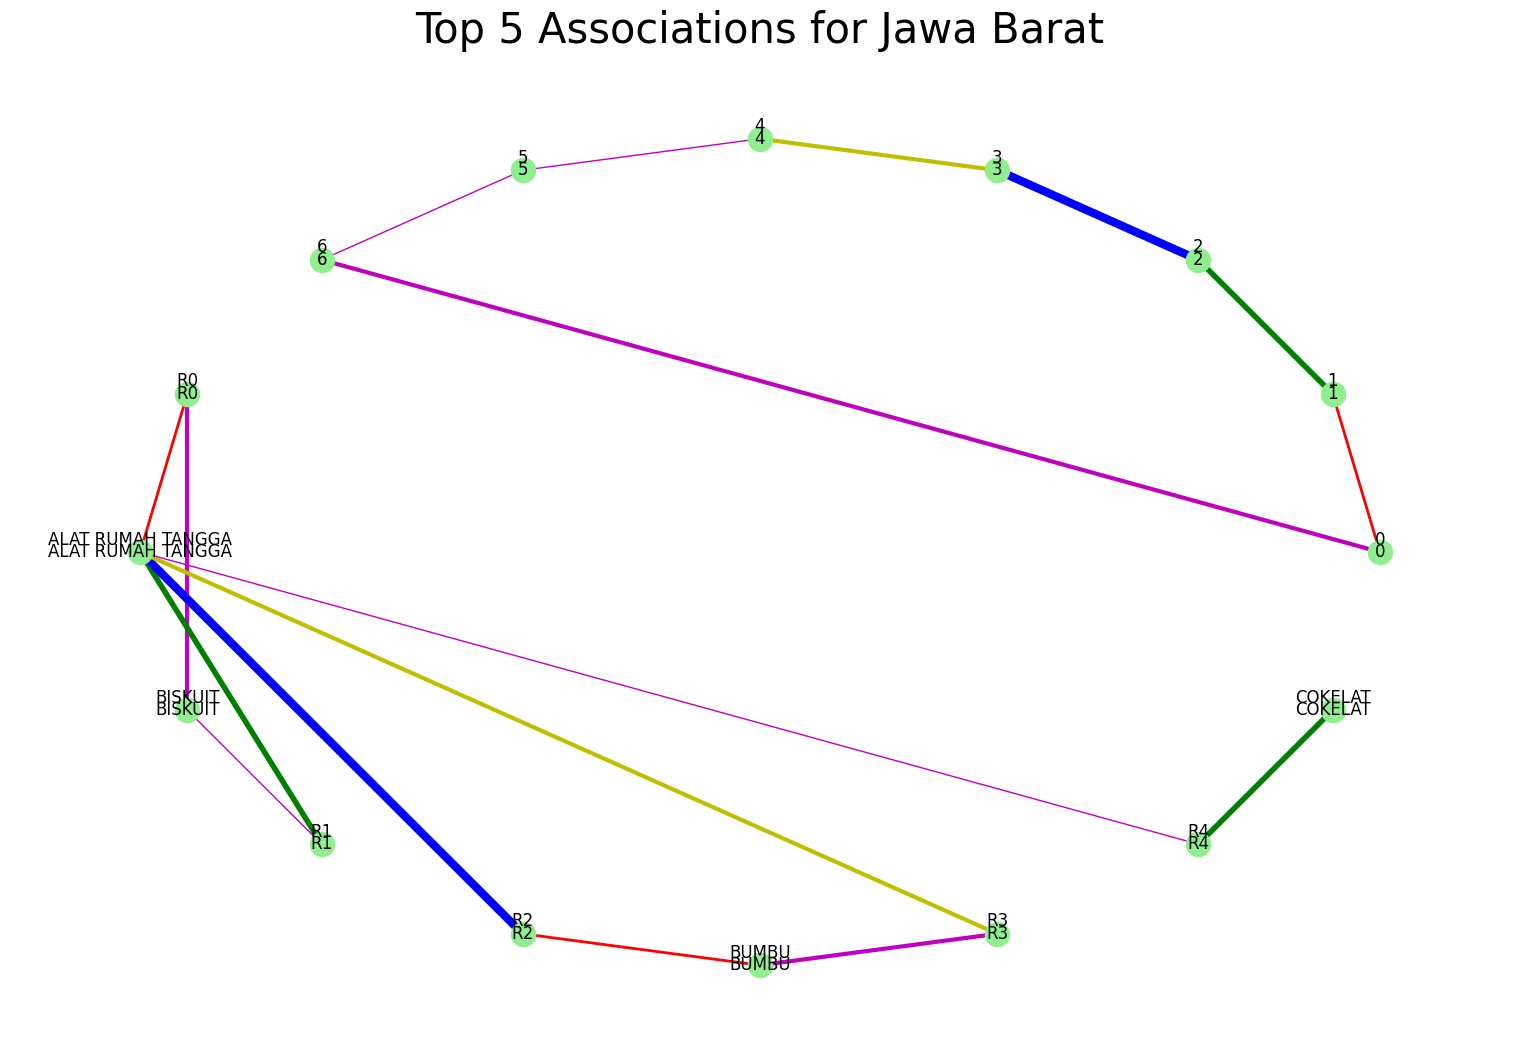

In [ ]:
draw_rules(rules2, 'Jawa Barat')

In [ ]:
# Transformasi Data
basket1=(df[df['PROVINSI']=='JAWA TIMUR'].groupby(['InvoiceNo', 'PRODUCT_CATEGORY'])['Quantity'].count()\
        .unstack().reset_index().fillna(0)\
        .set_index('InvoiceNo')
        )


basket1.head()

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket1

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [ ]:
# Proses Encoded data
# Supaya membentuk flag 1 dan 0

def encode_units(x):
  if x <= 0:
    return 0
  if x >= 0:
    return 1

basket1_sets = basket1.applymap(encode_units)
basket1_sets.tail(5)

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
581586,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
581587,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
frequent1_itemsets = apriori(basket1_sets, min_support=0.1, use_colnames=True)
frequent1_itemsets

,support,itemsets
0,0.299223,(ALAT RUMAH TANGGA)
1,0.335022,(BISKUIT)
2,0.162107,(BUMBU)
3,0.170888,(COKELAT)
4,0.245019,(DETERGEN)
...,...,...
146,0.104863,"(OBATAN, PARFUM, SABUN & SAMPHOO)"
147,0.103006,"(PARFUM, SUSU, SABUN & SAMPHOO)"
148,0.108072,"(KOSMETIK, BISKUIT, MINUMAN, SABUN & SAMPHOO)"
149,0.101486,"(KOSMETIK, MINUMAN, OBATAN, SABUN & SAMPHOO)"


In [ ]:
rules2 = association_rules(frequent1_itemsets, metric='lift', min_threshold=1)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALAT RUMAH TANGGA),(BISKUIT),0.299223,0.335022,0.159743,0.533860,1.593508,0.059497,1.426563
1,(BISKUIT),(ALAT RUMAH TANGGA),0.335022,0.299223,0.159743,0.476815,1.593508,0.059497,1.339442
2,(DETERGEN),(ALAT RUMAH TANGGA),0.245019,0.299223,0.117190,0.478291,1.598441,0.043875,1.343233
3,(ALAT RUMAH TANGGA),(DETERGEN),0.299223,0.245019,0.117190,0.391648,1.598441,0.043875,1.241027
4,(KOSMETIK),(ALAT RUMAH TANGGA),0.386525,0.299223,0.169537,0.438619,1.465860,0.053880,1.248310


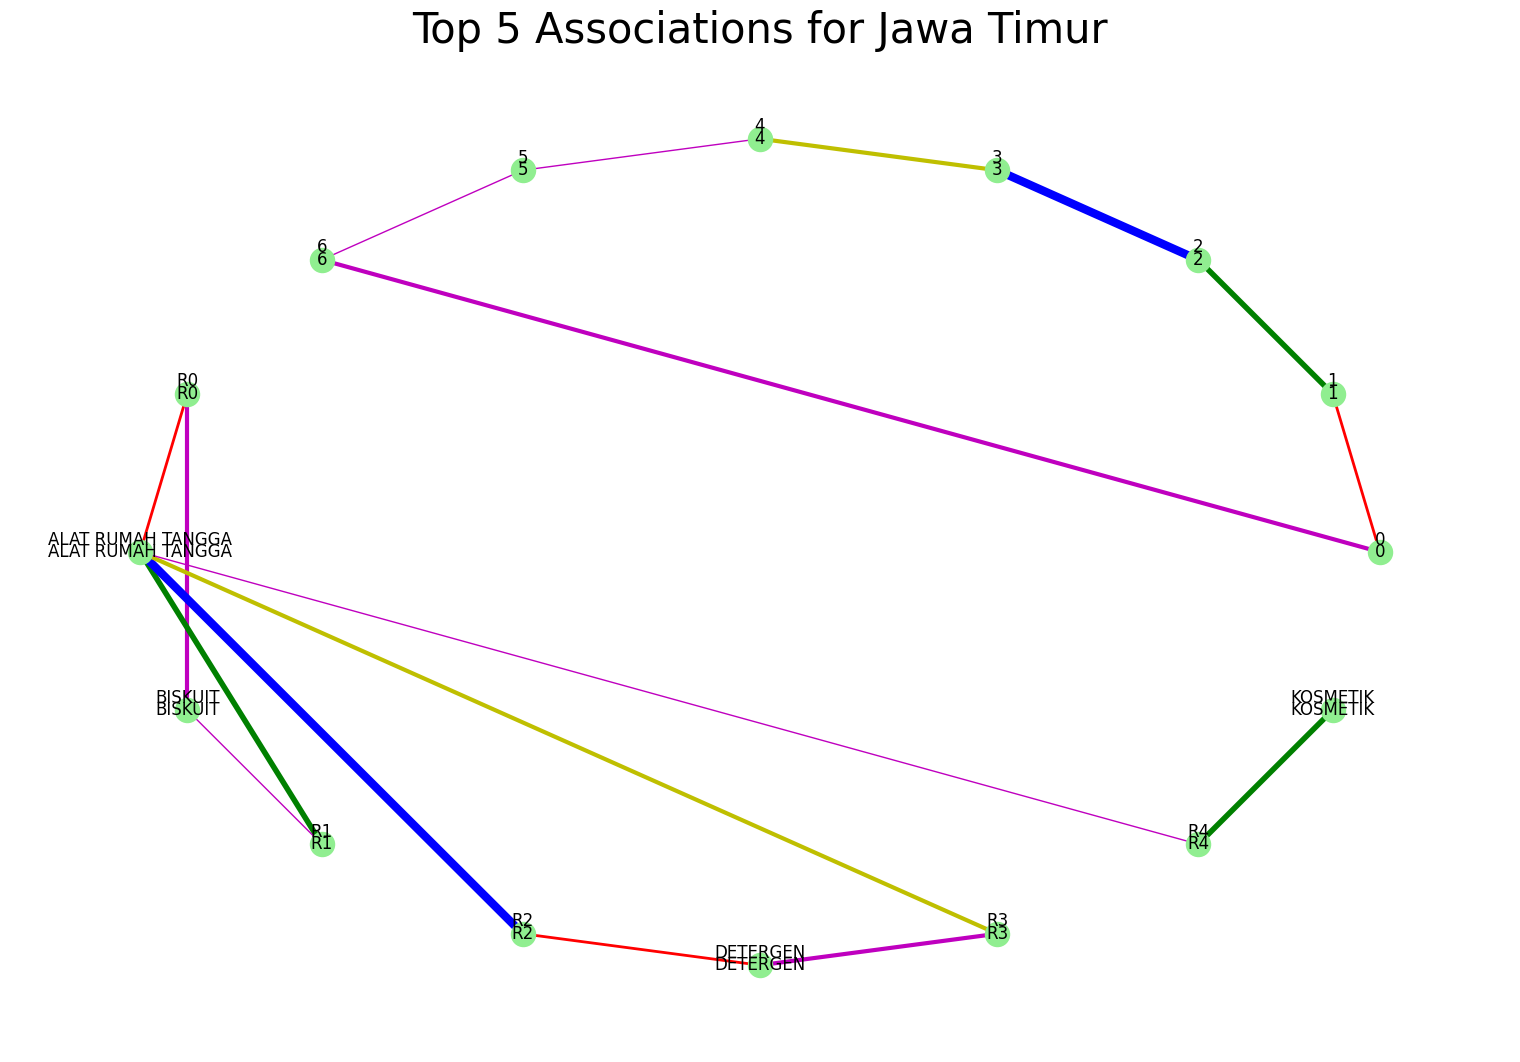

In [ ]:
draw_rules(rules2, 'Jawa Timur')